# Linear Regression in Python
## Goals
### Learning Agenda
Use Python (Pandas, Matplotlib, Scipy, Scikit-Learn) to perform regression

### Example Challenge
1. Predict students' final grades using the first exam of the semester
2. Predict students' final grades using the first three exams of the semester

### The Plan
1. Prepare the Environment
2. Pandas: read a local csv
3. Pandas: sample and summarize
4. Pandas: ensure no null values
5. SKlearn: split into test/train
6. Matplotlib & Seaborn: Explore
7. Scipy: Pearson's correlation
8. Statsmodels: Feature Selection
9. Scikit-Learn: Fit Linear Regression Models, In-Sample Predictions
10. Scikit-Learn: In-Sample Evaluations
11. Scikit-Learn: Make any changes needed & repeat 9-10 as needed
12. Scikit-Learn: Out-of-sample predictions using best model
13. Exercises

# 1. Prepare the Environment

In [46]:
# # ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# 2. Pandas: read a local csv

In [37]:
path = '~/desktop/codeup_work/regression/'
df = pd.read_csv(path + "student_grades.csv")

# 3. Pandas: sample and summarize

In [6]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [7]:
df.shape

(104, 5)

In [8]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


### Exercise

Extract information from the results of describe in order to compute IQR and range

IQR = 

Range = 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          104 non-null int64
exam2          104 non-null int64
exam3          104 non-null int64
final_grade    104 non-null int64
dtypes: int64(5)
memory usage: 4.1 KB


# 4. Pandas: ensure no null values

The above can tell you something about missing values when you compare the entries with each fields non-null values. You can also do this for a more direct compuation:

In [11]:
print(df.isnull().sum())
# or  print(df.columns[df.isnull().any()])

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64


# 5. Distribution, Skewness, Normalization & Standardization

Plot histograms &/or boxplots to see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

## Histogram
There are 2 ways we can go about plotting histograms for multiple variables.

1. melt the data frame into a long data set and use seaborn's 'FacetGrid' to plot each histogram quickly.
2. use matplotlib with subplots

MELT DATA AND USE FACETGRID TO PLOT HISTOGRAM

In [12]:
# we will create a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

df_melted.head()

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


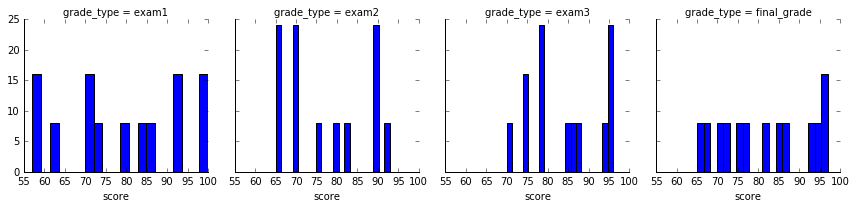

In [38]:
# Histogram
grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=20); #this tells it what to plot and what type of plot

USING MATPLOTLIB WITH SUBPLOTS

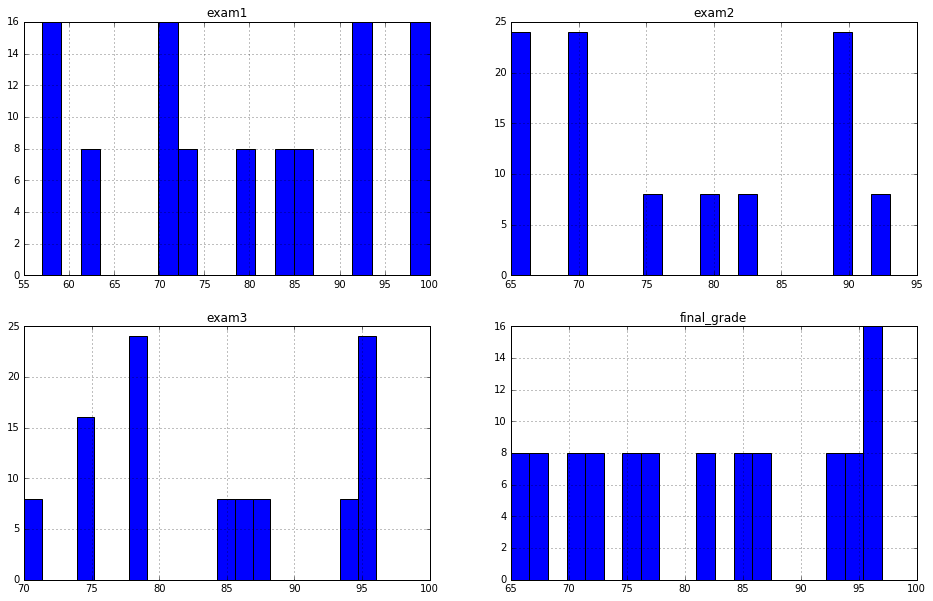

In [39]:
plt.figure(figsize=(16, 10))

# this for loop is instead of putting 
# for i in len(list):
#      list[i]
# so i goes from 0,1,2,3
# and col goes from exam1,exam2,exam3,final_grade
for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col] #this accesses the entire column
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)


### Question: what would happen if I added another chart to position 142?

#### Box Plot

seaborn will default to plotting all the numeric variables if we don't specify specific x and y values. This is the behavior we want, except we don't want to plot the student_id column.

We'll use the .drop method to remove the student_id column from the data frame. Recall that .drop will produce a new data frame without the specified column(s), but will not modify the original data frame.

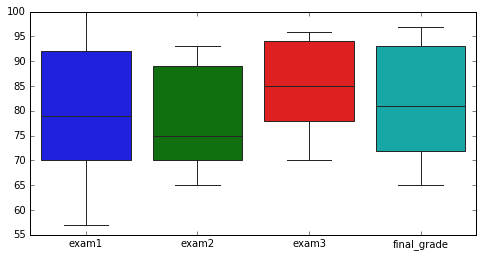

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

# 6. SKlearn: split into test/train

In [41]:
# test_train_split
# axis = 1 references columns
# axis = 0 would reference rows
# could select instead of dropping, but usually
# more independent variables than dependent ones
# note capital X and lower case y...
# X contains all of the variables, x1, x2, x3,...xn
# whereas y is only y, the function

X = df.drop(['final_grade','student_id'], axis=1)
y = df[['final_grade']]

# note it's train_test_split, not test_train_split
# the more observations you have, the closer train_size gets to .5
# random_state sets the seed for the random number generator so that
# you can duplicate your results
# train_test_split returns four dataframes in order...

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

# this returns four dataframes
# need to separate X and y for some uses, 
# but also need them in one datafram

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

Below we show some python code that validates that the splits are what we would expect. That is, we ensure that:

* the number of rows in both the x and y training data set are equal
* the number of rows in both the x and y testing data set are equal
* the number of columns in the training and test data sets are the same
* the training data set is 80% of the original data, the test set is 20%

In [17]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


# 7. Matplotlib & Seaborn: Explore
* Graphs are many and are quickly made
* Axis and labels are cleaned up later
* Color and size are used for information, not asthetics
* Graph types include box plts, heatmaps, histograms, density plots, feature or correlation plots
* Jointplot: Scatterplot with Density Plots
* PairGrid: Scatterplots with Histograms
* Heatmap

### Scatterplot + Density Plots


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


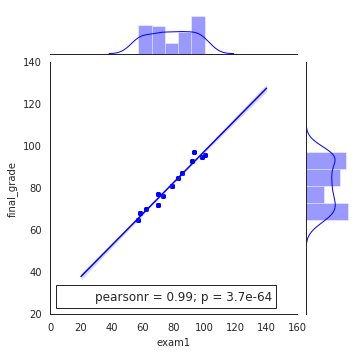

In [18]:
with sns.axes_style('white'):
    j = sns.jointplot("exam1", "final_grade", data=train, kind='reg', height=5);
    # could also put
    # j = sns.jointplot(X_train['exam1'], X_train['final_grade'], kind='reg', height=5);
    # or could do
    # j = sns.jointplot(X_train['exam1'], y_train['final_grade'], kind='reg', height=5);

    j.annotate(stats.pearsonr)
plt.show()

### Exercise
1. Write a for loop to plot each of the 3 features with final_grade using a jointplot.
2. What can you say about each relationship (using pearson's r and the p-value)

### Histogram + Scatterplots

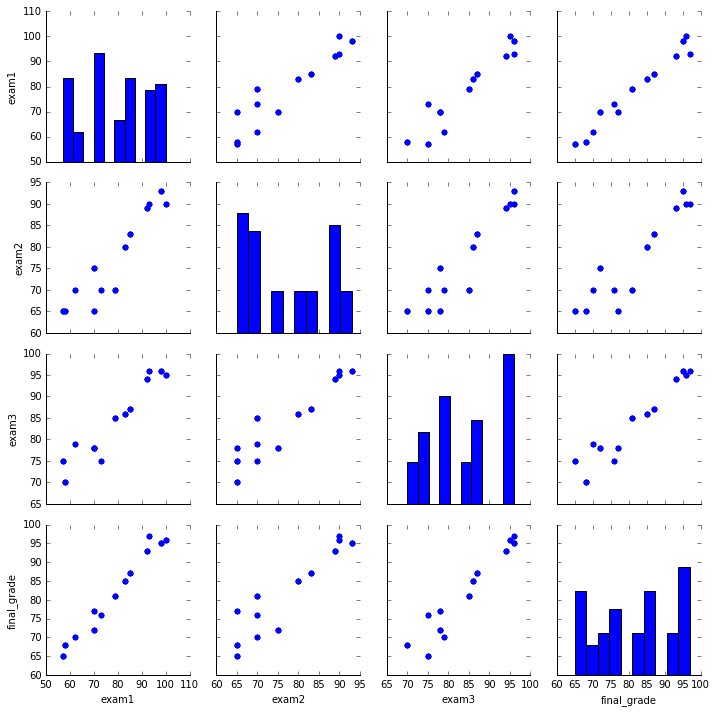

In [20]:
# This is roughly equivalent to sns.jointplot, but we see here that we have the
# flexibility to customize the type of the plots in each position.

g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

### Heatmap

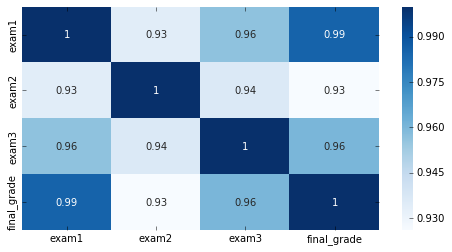

In [21]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

### Exercise

1. What is the difference in using plt.show() and not using plt.show()?
2. Find a way to plot a boxplot and heatmap side by side.

# 7. Scipy: Pearson's Correlation

### stats.pearsonr
This line only finds r for exam/y_train

In [22]:
pearsonr(X_train[['exam1']], y_train)

(array([0.98548827]), array([3.67959731e-64]))

### List Comprehension
This line finds r for all the columns in X_train

In [23]:
[[column, pearsonr(train[column], train.final_grade)] for column in X_train] 

[['exam1', (0.9854882734738365, 3.679597306767771e-64)],
 ['exam2', (0.9260773842724218, 4.9387065956533756e-36)],
 ['exam3', (0.9604227932900589, 1.0003417783597307e-46)]]

### Create Dictionary
This block of code puts the r values into a dictionary

In [24]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.final_grade) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'exam1': (0.9854882734738365, 3.679597306767771e-64),
 'exam2': (0.9260773842724218, 4.9387065956533756e-36),
 'exam3': (0.9604227932900589, 1.0003417783597307e-46)}

# 8. Statsmodels: Feature Selection

### Feature selection using statsmodels.OLS (Ordinary Least Squares)

In [25]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.76e-131
Time:                        09:15:42   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion

Looking at the p-values of the 3 exams, I am going to remove exam2 from the features as we are not seeing any significance of that with the final grade, our target variable.

I will now use sklearn to create a model using exam 1, exam3 and exam 1 & 3 to compare results.

(Well, I will model exam 1 (lm1) and exam 1 & 3 (lm2), and you will test exam 3 alone (lm3))

# 9. Scikit-Learn: Fit Linear Regression Models, In-Sample Predictions

Generally speaking, we'll use scikit-learn like this:

1. Import the class(es) that we intend on using (we've already done this)
2. Split the data into training and test (we've already done this)
3. Create an instance of the class(es) to use
4. Fit the model(s) with the training data
5. Use the model(s) to make predictions
6. Evaluate the performance of the model(s)

### Create the linear regression object

We'll create two separate models: one that is based solely on exam 1, and one that is based on exam 1 and exam 2.

In [57]:
# Create linear regression objects
lm1 = LinearRegression()
lm2 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


### Fit/Train the model

This is where we feed the training data into the models, and model parameters are "learned".

In [27]:
lm1.fit(X_train[['exam1']], y_train)
lm2.fit(X_train[['exam1', 'exam3']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's take a look at the parameters that the models calulated:

In [28]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): {:5.2f}'.format(lm1.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm1.coef_[0][0]))
print()
print('Multivariate - final_exam = b + m1 * exam1 + m2 * exam3')
print('    y-intercept  (b): {:5.2f}'.format(lm2.intercept_[0]))
print('    coefficient (m1): {:5.2f}'.format(lm2.coef_[0][0]))
print('    coefficient (m2): {:5.2f}'.format(lm2.coef_[0][1]))

Univariate - final_exam = b + m * exam1
    y-intercept (b): 22.88
    coefficient (m):  0.75

Multivariate - final_exam = b + m1 * exam1 + m2 * exam3
    y-intercept  (b): 12.80
    coefficient (m1):  0.60
    coefficient (m2):  0.26


sklearn conventions

Sklearn uses an underscore suffic to indicate properties which are learned from the data (as opposed to being inherit to the model itself.)

IN-SAMPLE PREDICTION (TRAINING DATA)

Now that we have a model, we can use the model to make predictions. We'll start by using our model to predict based on the test data set.

In [59]:
lm1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [29]:
y_pred_lm1 = lm1.predict(X_train[['exam1']])
y_pred_lm2 = lm2.predict(X_train.drop(columns=['exam2']))

We can visualize the predictions by plotting the predictions vs the actual values:

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

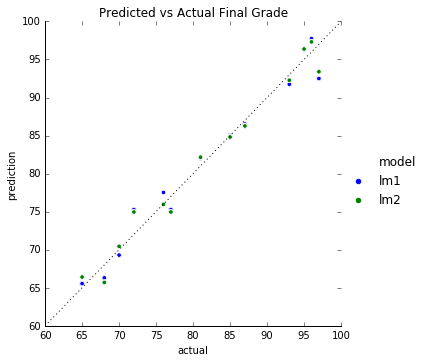

In [30]:
# the predictions are a 1 x 83 two dimensional matrix, but we want just
# a single array of predictions. We can use the .ravel method to achieve
# this.

pd.DataFrame({'actual': y_train.final_grade,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

Here the line down the middle represents "perfect" prediction. The further away from this line the are, the farther off the prediction was.

# 10. Scikit-Learn: In-Sample Evaluations

Now let's take a look at a couple performance metrics for our models: the mean squared error and r-squared values.

In [31]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm2))

lm1
  mse: 3.37
  97.12% of the variance in the students final grade can be explained by the grade on the first exam.
lm2
  mse: 2.94
  97.49% of the variance in the students final grade can be explained by the grades on exam 1 and 3.


This is saying the actual grade is well predicted by exam1.

# 11. Scikit-Learn: Make any changes needed & repeat 9-10 as needed

### Exercise

1. What are your take-aways from the evaluation results above?

The mse of lm2 was better probably because it has more variables.

2. Fit, predict, and evaluate one more model, lm3, using exam 3 only.

3. How does the result of the model compare to the other two? Which should you use, based on these results?

# 12. Scikit-Learn: Out-of-sample predictions using best model

### Predict final grades using testing data

In [32]:
# Make predictions using the testing set
y_pred_lm2 = lm2.predict(X_test[['exam1', 'exam3']])

### Evaluate performance

In [33]:
mse = mean_squared_error(y_test, y_pred_lm2)

print("Mean squared error: %.2f" % mse)

Mean squared error: 3.42


In [34]:
r2 = r2_score(y_test, y_pred_lm2)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first 3 exams.'
      .format(r2))

97.20% of the variance in the students final grade can be explained by the grades on the first 3 exams.


### Plot Residuals

Text(0, 0.5, 'Residuals')

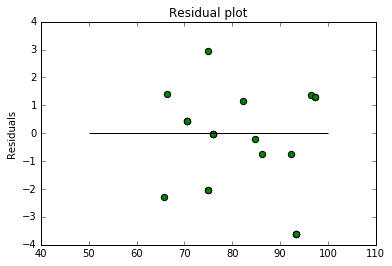

In [35]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')